# Clustering Analysis - LDA + kMeans
- **Created by Andrés Segura-Tinoco**
- **Created on May 26, 2022**

## Loading main libraries and data

In [1]:
# Load the Pandas libraries
import pandas as pd
import numpy as np

In [2]:
# Load scikit-learn libraries
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Interact libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
# Read dataset from disk
dataURL = "../../../data/dataset_full.csv"
raw_data = pd.read_csv(dataURL)
print(raw_data.shape)

(295, 2371)


In [6]:
raw_data.head()

,$number$,a,abasteciera,abierto,abiertos,abietas,abra,abre,abren,abrian,...,kw_ya_que,struc_modal_auxiliary,struc_text_length,struc_text_position,struc_token_count,struc_avg_word_length,struc_punct_marks_count,synt_parse_tree_depth,synt_sub_clauses_count,label
0,0.2,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.311927,0.0,0.3500,0.333333,0.090909,0.476190,0.385965,premise
1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.103211,0.0,0.0750,0.666667,0.000000,0.285714,0.105263,claim
2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.190367,0.0,0.2125,0.166667,0.000000,0.523810,0.263158,claim
3,0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.333333,0.917431,0.0,0.9625,0.333333,0.272727,0.666667,1.000000,premise
4,0.4,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.333333,0.467890,0.0,0.5125,0.333333,0.181818,0.428571,0.543860,premise


In [7]:
# Function that obtains the numerical data from the data frame
def getNumericalData(df):
    num_df = pd.DataFrame()
    
    # Create DataFrame
    for col in df.columns:
        if str(df[col].dtype) in ["int64", "float64"]:
            num_df[col] = df[col]
    
    return num_df

In [8]:
# Get only numeric columns/variables
num_data = getNumericalData(raw_data)
print(num_data.shape)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_7756/1727221646.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  num_df[col] = df[col]


(295, 2370)


In [9]:
num_data.head()

,$number$,a,abasteciera,abierto,abiertos,abietas,abra,abre,abren,abrian,...,kw_también,kw_ya_que,struc_modal_auxiliary,struc_text_length,struc_text_position,struc_token_count,struc_avg_word_length,struc_punct_marks_count,synt_parse_tree_depth,synt_sub_clauses_count
0,0.2,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.311927,0.0,0.3500,0.333333,0.090909,0.476190,0.385965
1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.103211,0.0,0.0750,0.666667,0.000000,0.285714,0.105263
2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.190367,0.0,0.2125,0.166667,0.000000,0.523810,0.263158
3,0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.333333,0.917431,0.0,0.9625,0.333333,0.272727,0.666667,1.000000
4,0.4,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.333333,0.467890,0.0,0.5125,0.333333,0.181818,0.428571,0.543860


## Apply LDA

In [10]:
# Function that apply Principal Component Analysis
def apply_lda(data, labels, std, n):
    
    # Standardize the Data
    if std == True:
        X = StandardScaler().fit_transform(data.values)
    else:
        X = data.values
    
    enc = LabelEncoder()
    label_encoder = enc.fit(labels)
    y = label_encoder.transform(labels) + 1
    
    # Create a DataFrame from PCA
    lda = LDA(n_components=n)
    lda_data = lda.fit_transform(X, y)
    lda_variance = lda.explained_variance_ratio_
    components = ["LDA"+str(i) for i in range(1, n+1)]
    lda_df = pd.DataFrame(data=lda_data, columns=components)
    
    return lda_df, lda_variance

In [11]:
# Apply the PCA algorithm
n_components = 2
labels = raw_data["label"]
lda_df, lda_var = apply_lda(num_data, labels, False, n_components)
print(n_components)

2


In [12]:
# Show the total explained variance ratio of model
print('Explained Variance Ratio:', sum(lda_var) * 100)

Explained Variance Ratio: 100.0


In [13]:
# Create the PCA data
lda_df = pd.concat([lda_df, raw_data[["label"]]], axis = 1)
lda_df.head()

,LDA1,LDA2,label
0,2.878820,0.132114,premise
1,-3.801128,-3.481856,claim
2,-3.805846,-3.472628,claim
3,3.008418,-0.121410,premise
4,2.986853,-0.079223,premise


## PCA Variance Ratio

In [14]:
# Create horizontal bar chart data
bars = tuple(lda_df.columns[:n_components])
y_pos = np.arange(len(bars))
values = lda_var * 100
cum = np.cumsum(values)

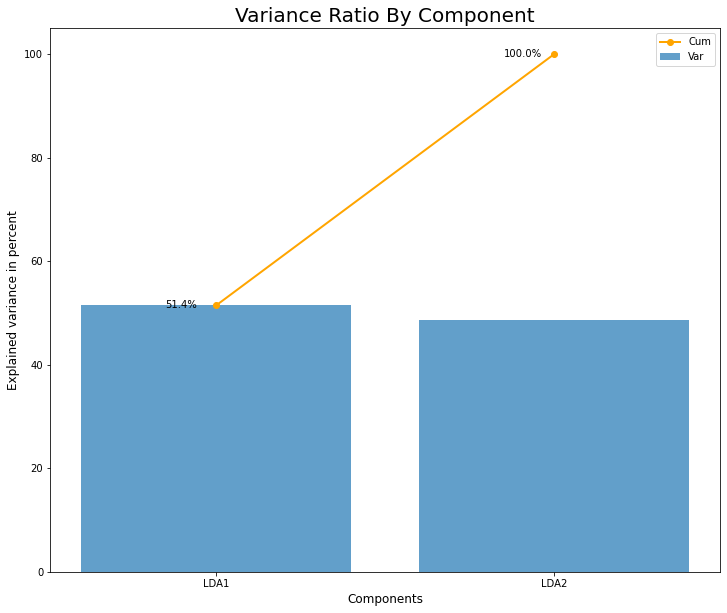

In [15]:
# Set up the matplotlib figure
fig, ax2 = plt.subplots(figsize = (12, 10))

plt.bar(y_pos, values, align = "center", alpha = 0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color = "orange", linewidth = 2, marker="o")
plt.title("Variance Ratio By Component", fontsize = 20)

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i-.15, v-0.5, (str(round(v, 1))+"%"), color="black", fontweight="normal", fontsize=10)

# Plot setup
plt.xlabel("Components", fontsize = 12)
plt.ylabel("Explained variance in percent", fontsize = 12)
plt.legend(("Cum", "Var"), loc = "best")
plt.show()

## Clustering: K-Means

In [16]:
# Getting the values and plotting it
X = lda_df.iloc[:,:-1].values
y = lda_df.iloc[:,-1].values

In [17]:
# Calculating the Jambu Elbow
k_range = range(1, 20)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


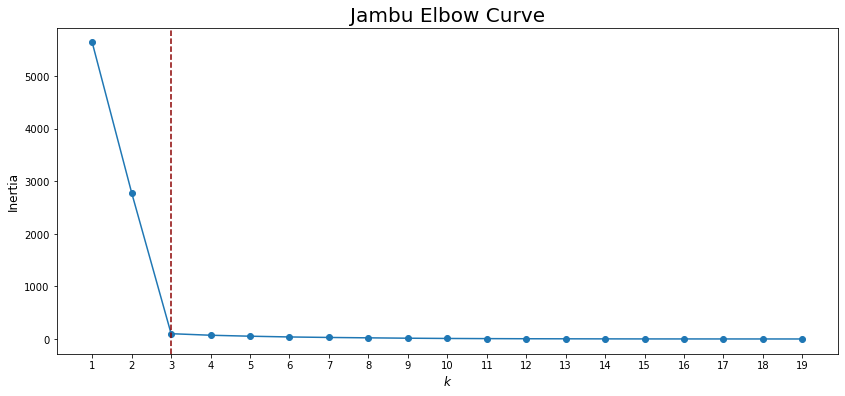

In [18]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(k_range, inertias, marker='o')
plt.axvline(x = 3, color = "#8b0000", linestyle = "--")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("$k$", fontsize = 12)
plt.ylabel("Inertia", fontsize = 12)
plt.title("Jambu Elbow Curve", fontsize = 20)
plt.show()

### Compare results with K-means grouping

In [19]:
# Create scatter plot with K-Means data
def plot_kmeans_data(data, k_clusters, centroids, clusters):
    fig, ax = plt.subplots(figsize = (14, 14))
    
    # Plotting vars
    colors = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    nData = len(data)
    
    # Create scatter plot
    for i in range(k_clusters):
        points = np.array([data[j] for j in range(nData) if clusters[j] == i])
        sns.scatterplot(ax=ax, x=points[:, 0], y=points[:, 1], size=5, color=colors[i])
    plt.scatter(centroids[:, 0], centroids[:, 1], s=20, color="black", marker="D")
    
    # Plot setup
    ax.set_xlabel("PC 1", fontsize = 12)
    ax.set_ylabel("PC 2", fontsize = 12)
    ax.set_title("Argumentative Annotations - Clustering results", fontsize = 20)
    ax.legend(["Cluster " + str(i) for i in range(1, k_clusters+1)])
    ax.grid()

In [20]:
# Calculates the K-Means for (x, y) dataset
def run_kmeans(k_clusters):
    kmeans = KMeans(n_clusters=k_clusters, algorithm="elkan", random_state=42)
    kmeans = kmeans.fit(X)
    
    # Getting the cluster labels
    clusters = kmeans.predict(X)
    
    # Centroid values
    centroids = kmeans.cluster_centers_
    
    # Plotting K-Means result
    plot_kmeans_data(X, k_clusters, centroids, clusters)

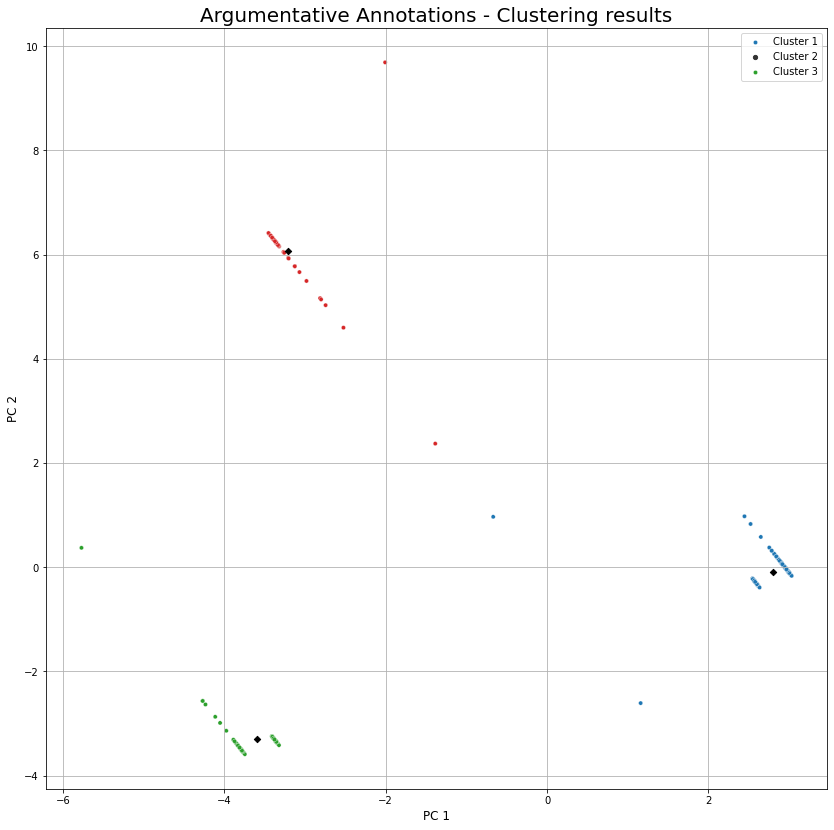

In [21]:
# Create interactive control to control k value
# interactive(run_kmeans, k_clusters = widgets.IntSlider(min=1, max=7, step=1, value=3))
run_kmeans(k_clusters=3)

### Compare results with natural grouping

In [22]:
# Palette by positions dictionary
color_palette = dict()
color_palette["majorclaim"] = "#dc3912"
color_palette["claim"] = "#3366cc"
color_palette["premise"] = "#ff9900"
color_palette["spam"] = "#109618"

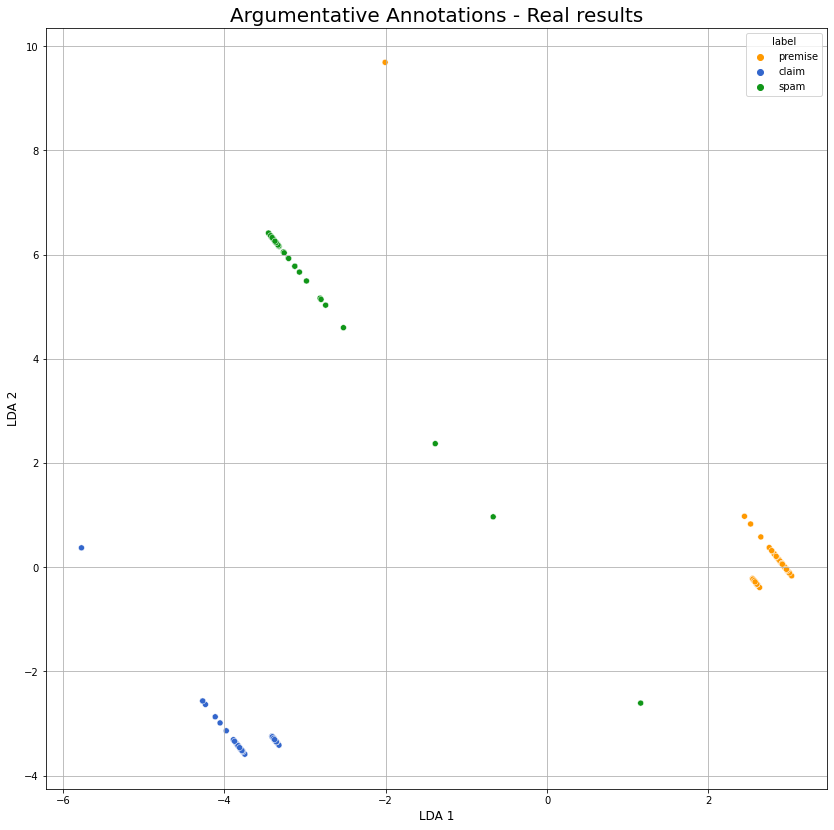

In [23]:
# Create scatter plot with players label
fig, ax = plt.subplots(figsize = (14, 14))

# Create 2D scatter plot
plot = sns.scatterplot(ax=ax, data=lda_df, x="LDA1", y="LDA2", hue="label", palette=color_palette)

# Plot setup
ax.set_xlabel("LDA 1", fontsize = 12)
ax.set_ylabel("LDA 2", fontsize = 12)
ax.set_title("Argumentative Annotations - Real results", fontsize = 20)
ax.grid()

---
<a href="https://ansegura7.github.io/DataScience_FIFA19Data/">&laquo; Home</a>